# Heaps

## Hilfsfunktionen zur Darstellung eines Arrays als vollständigen Binärbaum

Bevor wir mit der Implementation von Heaps beginnen, schreiben wir eine Hilfsmethode, die uns ein Array als Baum interpretieren lässt und diesen graphisch darstellt. Sie müssen diesen Code nicht verstehen, sondern nur wissen, dass die Methode ```showArrayAsTree(a)``` die Elemente ```a[1], ..., a[N]``` eines Arrays ```a``` als Baum darstellt. 

In [86]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import math

def _buildGraph(g, a, k, xPos, N):
    height = math.floor(math.log(N, 2)) # Höhe vom Baum
    depth = math.floor(math.log(k, 2)) # Tiefe des aktuellen Knotens
    if k >= N:
        return
    else:
        y = (height - depth)
        g.add_node(k, pos=(xPos, y), label=str(a[k]))
        if k > 1: g.add_edge(k, k // 2)
        _buildGraph(g, a, k *2 , xPos - 2**(height - depth), N)
        _buildGraph(g, a, k * 2 + 1, xPos + 2**(height - depth),  N)
        
    
def showArrayAsTree(a):
    g = nx.Graph()
    _buildGraph(g, a, 1, len(a) / 2 + 1, len(a))
    pos=nx.get_node_attributes(g,'pos')
    labels = nx.get_node_attributes(g, 'label')
    
    nx.draw_networkx_nodes(g, pos, node_size=1000, node_color='#00b4d9')
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)
    plt.show()

## Hilfsfunktionen swim und sink

Wir beginnen mit der Implementation der wichtigsten Heap Funktionen, nämlich ```swim``` und ```sink```.

```swim``` bringt das $k$-te Element durch Vertauschen mit dem Parent nach oben, bis die Heapbedingung wieder erfüllt ist. 

In [87]:
def swim(heap, k):
    
    # Solange nicht wurzel und Parent kleiner ist
    while k > 1 and heap[k // 2] < heap[k]:
        
        # Tausche Parent Kind
        heap[k // 2], heap[k] = heap[k], heap[k // 2]
        
        # Gehe zu parent
        k = k // 2      

```sink``` bringt das $k$-te Element durch Vertauschen mit dem jeweils grösseren Kind nach unten, bis die Heapbedingung wieder erfüllt ist.
Mit dem optionalen Element ```N``` können wir auch angeben, dass nur der Teil vom Array bis zum Element mit Index ```N``` betrachtet wird. 

In [107]:
def sink(heap, k, N = None):
    
    if N == None: N = len(heap) - 1
        
    while 2 * k <= N: # solange mindestens ein Kind
        j = 2 * k # gehe zu Kind
        
        # Wähle Kind mit grösserem Wert falls beide vorhanden
        if j < N and heap[j] < heap[j + 1]:
            j += 1 
        
        # Abbrechen wenn parent nicht mehr grösser ist
        if not heap[k] < heap[j]:
            break
        # Tausch
        heap[j], heap[k] = heap[k], heap[j]
        
        
        # Weiter mit Kind
        k = j

Mittels der Methode ```swim``` können wir nun jedes Array so umsortieren, dass es die Heapbedingung erfüllt. 

In [108]:
def heapify(heap):
    for i in range(1, len(heap)):
        swim(heap, i)

Jetzt können wir unsere Methoden testen:

Zuerst testen wir die Darstellung für ein Array, welches die Heapbedingung nicht erfüllt:

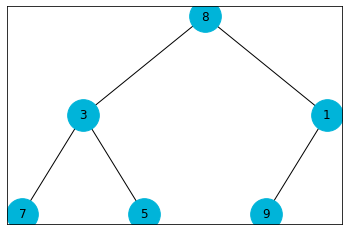

In [109]:
xs = [None, 8, 3, 1, 7, 5, 9]
showArrayAsTree(xs)

Nun stellen wir die Heapbedingung her und visualisieren das Array nochmals.

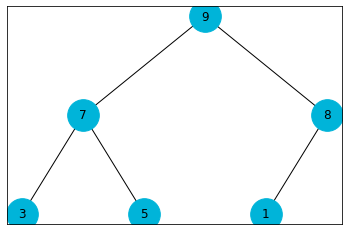

In [110]:
heapify(xs)
showArrayAsTree(xs)

Wie wir sehen, hat die Methode ```heapify``` die Heapbedingung wiederhergestellt. 


*Übung: Erstellen Sie ein heap und verletzen Sie dann die Heapbedingung punktuell. Rufen Sie dann die Methoden ```sink``` und ```swim``` auf, um die Heapbedinung wiederherzustellen. Visualisieren Sie die Zwischenschritte mit der Methode ```showArrayAsTree``` und experimentieren Sie mit verschiedenen Arrays.*


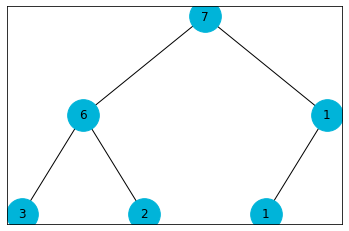

In [111]:
xs = [None, 8, 6, 7, 3, 2, 1]
#showArrayAsTree(xs)
xs[1] = 1
#showArrayAsTree(xs)
sink(xs, 1)
showArrayAsTree(xs)

# Priority Queue mittels Heap implementieren

Das Implementieren einer Priority Queue ist nun fast trivial. 
Die Funktionen ```sink``` und ```swim``` übernehmen die ganze Arbeit.

In [112]:
class PQ:
    def __init__(self):
        self._data = [None]
        
    def isEmpty(self):
        return len(self._data) <= 1
    
    def size(self):
        return len(self._data) -1
    
    def delmax(self):
        # Grösstes Element (die Wurzel) wird mit dem Element unten Rechts vertauscht.
        # Das letzte Element (welches jetzt dem grössten Element entspricht, wird
        # entfernt. Dann wird die HeapBedingung durch "sinken" der Wurzel wiederhergestellt.
        self._data[1], self._data[-1] = self._data[-1], self._data[1]
        item = self._data.pop()
        sink(self._data, 1)
        return item
    
    def max(self):
        return self._data[1]
    
    def insert(self, item):
        # Das Element wird hinten ins Array angefügt. Dann wird die Heapbedingung
        # durch ausführen von Swim wiederhergestellt.
        self._data.append(item)
        swim(self._data, len(self._data) - 1)
        

Auch Sortieren ist jetzt einfach. Wir fügen die Elemente einfach in eine PQ ein und nehmen immer das Grösste raus. Da ```swim``` und ```sink``` beide $O(log(N))$ Operationen brauchen, ist es offensichtlich, dass das Sortieren in $O(N log(N))$ Operationen geht.

In [113]:
testdata = [1,5, 2, 8 , 11]
pq = PQ()
for t in testdata:
    pq.insert(t)

sortedArray = []
while not pq.size() > 0:
    sortedArray.append(pq.delmax())

In [114]:
sortedArray

[]

*Übung: Implementieren Sie das Anwendungsbeispiel, welches die grössten m Elemente aus einem Stream sucht mit dieser Implementation von PriorityQueues. (Den Code finden Sie im Jupyter-Notebook zum Thema Priority-queues). Vergleichen Sie die Laufzeit.* 

#### Lösung:
Wir sehen experimentell, dass im Vergleich zur naiven Implementation (Notebook priority-queues.ipynb) die Laufzeit für grosse M (Anzahl Elemente die wir ausgeben) und grosse N (Anzahl Elemente im Stream) stark verbessert wird. Für kleine M ist der Unterschied vernachlässigbar. Dies bestätigt das theoretische Resultat, dass die Komplexität $O(N log M)$ ist.

In [115]:
import random

def numberGen(N):
    num = 0
    while num < N:
        yield random.gauss(0, 1)
        num += 1

In [116]:
n = numberGen(100)
for i in range(0, 1):
    print(next(n))

0.9304080889380753


In [117]:
def printSmallestNumbers(M, N):
    pq = PQ()
    for number in numberGen(N):

        pq.insert(number) 
        if pq.size() > M:
            pq.delmax() 
        
    while not pq.isEmpty():
        print(pq.delmax())


In [119]:
printSmallestNumbers(1000, 1000000)  

-3.1043841926882196
-3.10443018809284
-3.104547402606629
-3.105113074365936
-3.1052480733733145
-3.1053007465251015
-3.105440414092658
-3.1055017277585213
-3.1058329047929587
-3.106055909726573
-3.106405752989427
-3.106686132988478
-3.106898110223063
-3.107310119960974
-3.1073163347964474
-3.107343086280066
-3.107388509667823
-3.1080091914468175
-3.108071162845032
-3.108348758953578
-3.1084467231843154
-3.109221479855184
-3.1098680516785193
-3.1099358878885823
-3.109975165729847
-3.1100548408852977
-3.110269799951535
-3.1105204161991384
-3.110546717694225
-3.1106038182021742
-3.1107783162224703
-3.1116502828113535
-3.1119281024171053
-3.1129394763464155
-3.112994396599141
-3.1133221672295384
-3.1134327352141487
-3.114003228996701
-3.1140441324023342
-3.1145599350133155
-3.114805931386293
-3.115241893714878
-3.1154251168625184
-3.1157510935154695
-3.1157603917029872
-3.1160290506326236
-3.116204743714971
-3.1162579464022815
-3.116425150596108
-3.1164357615381633
-3.1166881170650647
-3.1

# Teil 2: Heapsort

*Arbeiten Sie erst an diesem Notebook, wenn Sie das entsprechende Video zum Thema Heapsort angeschaut haben.*

Sortieren geht aber noch etwas eleganter, und vor allem ohne zusätzlichen Speicherverbrauch, mit dem Heapsort Algorithmus. 

Um den Heap zu erstellen, können wir die Methode ```heapify``` noch etwas effizienter implementieren. Wir traversieren das Array von rechts nach links und stellen jeweils mittels ```sink``` die Heapbedingung her.

In [10]:
def heapify(a):
    N = len(a) - 1
    k = N // 2
    while k >= 1:
        sink(a, k)
        showArrayAsTree(a)
        k = k - 1

Wir testen dies für ein beliebiges Array:

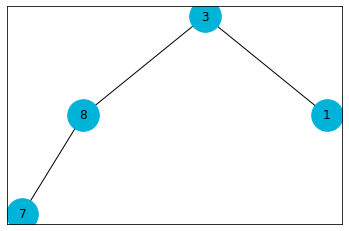

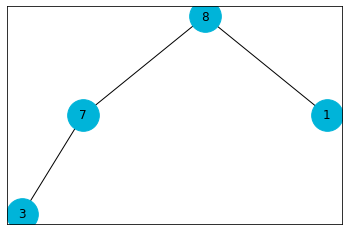

In [11]:
xs = [None, 3, 7, 1, 8]
heapify(xs)

Der Heapsort besteht jetzt aus 2 Schritten. 

1. Heap herstellen
2. Grösstes Element mit letztem Element tauschen und Heap herstellen
   * Dabei wird der Bereich im Array, auf dem Heapsort arbeitet, immer kleiner

In [42]:
def heapsort(a):
    N = len(a) - 1
    for k in range(int(N//2), 0, -1):
        sink(a, k)
    while N > 1:
        a[1], a[N] = a[N], a[1]
        N -= 1
        sink(a, 1, N)      

In [43]:
testarray = [None, 3, 1, 8, 11, 7, 9, 15]
heapsort(testarray)
print(testarray)

[None, 1, 3, 7, 8, 9, 11, 15]


*Übung: Geben Sie sich die Zwischenschritte im Code aus. Visualisieren Sie die Bäume, die entstehen. Experimentieren Sie mit verschiedenen Arrays*.